In [1]:
# Import libraries
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import seaborn as sns
import re
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Import the data set
london = pd.read_csv('LFB 2019 Incident data.csv',
    infer_datetime_format=True, )

In [3]:
london.head()

,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,209488,000287-01012019,2019/1/1,2019,2:39:50 AM,2,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SE15,0.000000e+00,22502728.0,E09000028,SOUTHWARK,Southwark,E05011113,RYE LANE,RYE LANE,NaN,NaN,534550.0,175850.0,NaN,NaN,London,Peckham,356.0,New Cross,655.0,Greenwich,2.0,2.0,2.0,1.0,333.0
1,209489,000175-01012019,2019/1/1,2019,1:04:04 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,Wheelie bin (domestic size),Nearby address - no building in street,TW5 9PP,TW5,2.000040e+11,21590176.0,E09000018,HOUNSLOW,Hounslow,E05000357,HESTON WEST,HESTON WEST,510847.0,177505.0,510850.0,177550.0,51.485644,-0.404939,London,Feltham,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0
2,209490,000159-01012019,2019/1/1,2019,12:54:41 AM,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,On land associated with building,UB5 6TL,UB5,1.204538e+07,20600919.0,E09000009,EALING,Ealing,E05000177,GREENFORD BROADWAY,GREENFORD BROADWAY,513219.0,183256.0,513250.0,183250.0,51.536866,-0.368948,London,Southall,241.0,Southall,NaN,NaN,1.0,1.0,1.0,1.0,333.0
3,209491,000610-01012019,2019/1/1,2019,8:29:28 PM,20,Fire,Secondary Fire,NaN,Outdoor Structure,Wheelie bin (domestic size),In street close to gazetteer location,SE15 3NY,SE15,2.000035e+11,22502208.0,E09000028,SOUTHWARK,Southwark,E05011113,RYE LANE,RYE LANE,534492.0,175783.0,534450.0,175750.0,51.465048,-0.065241,London,Peckham,273.0,New Cross,NaN,NaN,1.0,1.0,1.0,1.0,333.0
4,209492,000630-01012019,2019/1/1,2019,9:27:27 PM,21,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,E14,0.000000e+00,22702706.0,E09000030,TOWER HAMLETS,Tower Hamlets,E05009325,LANSBURY,LANSBURY,NaN,NaN,537950.0,181950.0,NaN,NaN,London,Poplar,284.0,Poplar,516.0,Millwall,2.0,2.0,2.0,1.0,333.0


In [4]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105008 entries, 0 to 105007
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              105008 non-null  int64  
 1   IncidentNumber                          105008 non-null  object 
 2   DateOfCall                              105008 non-null  object 
 3   CalYear                                 105008 non-null  int64  
 4   TimeOfCall                              105008 non-null  object 
 5   HourOfCall                              105008 non-null  int64  
 6   IncidentGroup                           105008 non-null  object 
 7   StopCodeDescription                     105008 non-null  object 
 8   SpecialServiceType                      33039 non-null   object 
 9   PropertyCategory                        105008 non-null  object 
 10  PropertyType                            1050

In [5]:
london.describe()

,Unnamed: 0,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
count,105008.000000,105008.0,105008.000000,1.050080e+05,1.050080e+05,52304.000000,52304.000000,105008.000000,105008.000000,52304.000000,52304.000000,98973.000000,40335.000000,104525.000000,104525.000000,104546.000000,104515.000000,104515.000000
mean,261991.500000,2019.0,13.418263,2.293770e+10,2.029383e+07,530642.720174,180359.619130,530629.426329,180465.771179,51.399667,-0.118673,313.124630,392.103558,1.380521,1.565798,1.621018,1.382548,466.856059
std,30313.342871,0.0,6.239380,4.783874e+10,4.798510e+06,10295.573364,7437.442509,9690.343388,7368.834109,2.349839,0.148378,133.043835,148.731250,0.723486,0.882190,1.705629,6.654691,2251.480749
min,209488.000000,2019.0,0.000000,0.000000e+00,8.100007e+06,503582.000000,156974.000000,503550.000000,156950.000000,0.000000,-0.510155,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,333.000000
25%,235739.750000,2019.0,9.000000,0.000000e+00,2.040077e+07,525165.750000,175941.750000,525250.000000,176150.000000,51.467754,-0.197541,230.000000,297.000000,1.000000,1.000000,1.000000,1.000000,339.000000
50%,261991.500000,2019.0,14.000000,0.000000e+00,2.110668e+07,530824.500000,181010.000000,530850.000000,181050.000000,51.512992,-0.116775,295.000000,368.000000,1.000000,1.000000,1.000000,1.000000,339.000000
75%,288243.250000,2019.0,18.000000,1.003342e+10,2.200615e+07,536920.250000,184961.000000,536350.000000,185150.000000,51.548035,-0.026886,373.000000,458.000000,2.000000,2.000000,2.000000,1.000000,339.000000
max,314495.000000,2019.0,23.000000,2.000044e+11,9.999042e+07,560107.000000,200870.000000,560150.000000,200850.000000,51.691279,0.308525,1199.000000,1200.000000,8.000000,12.000000,250.000000,1203.000000,407817.000000


In [6]:
london['DateOfCall'] = pd.to_datetime(london['DateOfCall'], infer_datetime_format=True)

In [7]:
london.groupby(['DateOfCall']).size().sort_values(ascending=False)

DateOfCall
2019-07-25    462
2019-10-01    423
2019-09-24    422
2019-03-10    407
2019-06-29    403
             ... 
2019-01-07    228
2019-01-09    227
2019-03-02    227
2019-01-14    226
2019-02-10    214
Length: 365, dtype: int64

In [37]:
dc['DateOfCall'] = pd.to_datetime(dc['DateOfCall'], infer_datetime_format=True)

In [38]:
dc['month'] = dc['DateOfCall'].dt.month.astype("category")

In [39]:
dc.head()

,DateOfCall,count,month
0,2019-07-25,462,7
1,2019-10-01,423,10
2,2019-09-24,422,9
3,2019-03-10,407,3
4,2019-06-29,403,6


In [10]:
#Feature Creation for response time in minutes
london['First_response_mins']= london['FirstPumpArriving_AttendanceTime']/60
london['Second_response_mins']= london['SecondPumpArriving_AttendanceTime']/60
#Date with year-month format
london['month'] = pd.to_datetime(london['DateOfCall']).dt.month

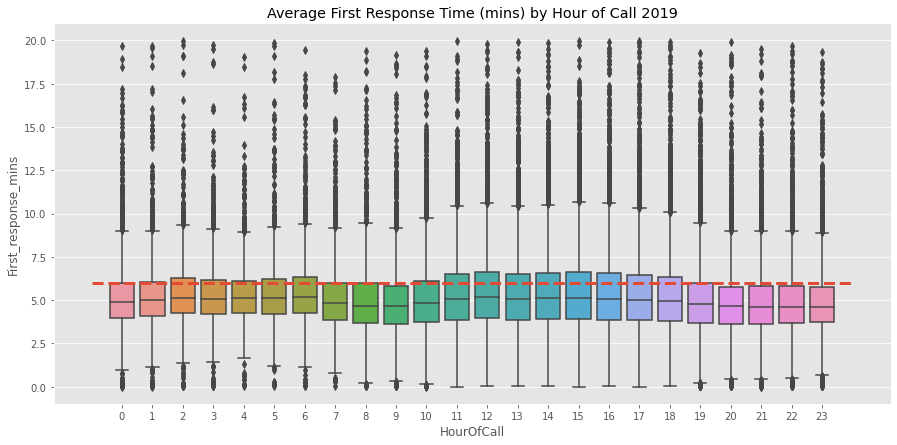

In [13]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (mins) by Hour of Call 2019')
sns.boxplot(data=london,x='HourOfCall', y='First_response_mins')
plt.plot([-1,24],[6, 6], linewidth=3,linestyle='dashed', )

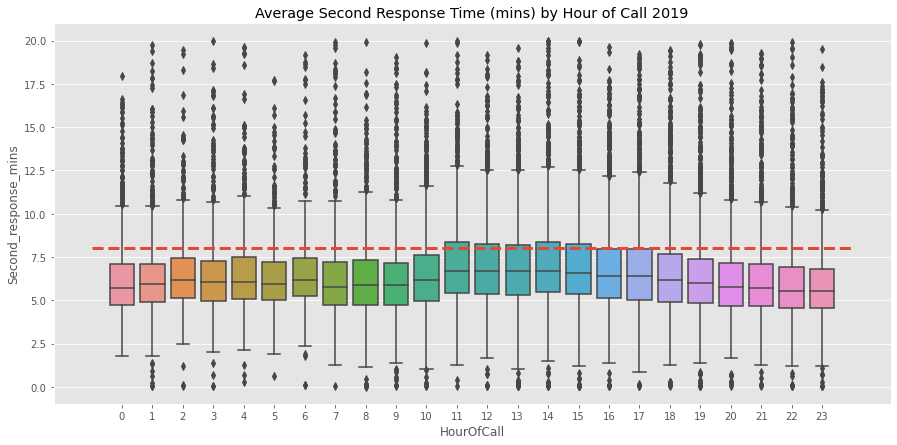

In [44]:
plt.figure(figsize=[15,7],)
plt.title('Average Second Response Time (mins) by Hour of Call 2019')
sns.boxplot(data=london,x='HourOfCall', y='Second_response_mins')
plt.plot([-1,24],[8, 8], linewidth=3,linestyle='dashed', )

<AxesSubplot:title={'center':'Calls by Incident Type'}, ylabel='StopCodeDescription'>

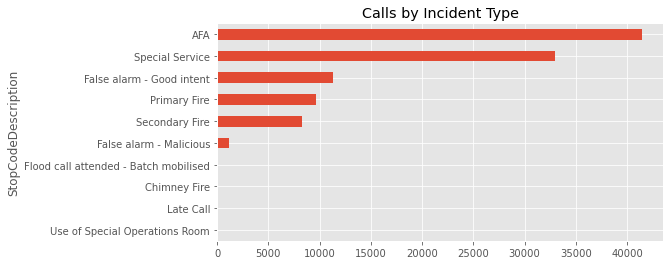

In [9]:
london.groupby(['StopCodeDescription']).size().sort_values().plot(kind='barh', figsize=[8,4], title='Calls by Incident Type')


<AxesSubplot:title={'center':'Calls by Incident Type'}, ylabel='PropertyCategory'>

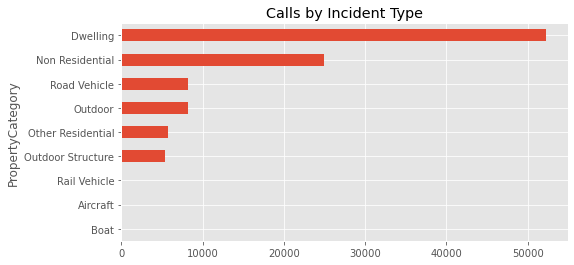

In [10]:
london.groupby(['PropertyCategory']).size().sort_values().plot(kind='barh', figsize=[8,4], title='Calls by Incident Type')


<AxesSubplot:title={'center':'Average First Response Time (mins) by Incident Type'}, xlabel='First_response_mins', ylabel='StopCodeDescription'>

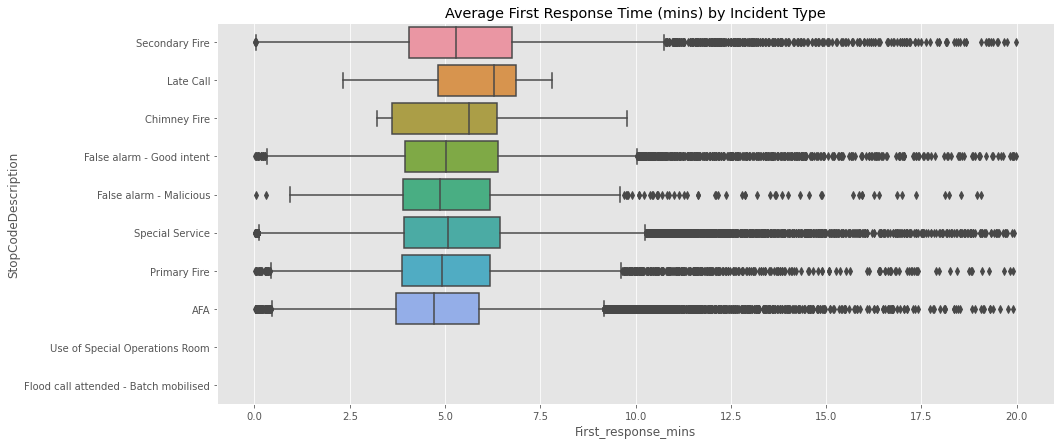

In [46]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (mins) by Incident Type')

ranks = london.groupby("StopCodeDescription")["First_response_mins"].mean().fillna(0).sort_values()[::-1].index
sns.boxplot(data=london, y='StopCodeDescription', x='First_response_mins', orient='h', order=ranks)

<AxesSubplot:title={'center':'Average First Response Time (mins) by Incident Type 2019'}, xlabel='First_response_mins', ylabel='PropertyCategory'>

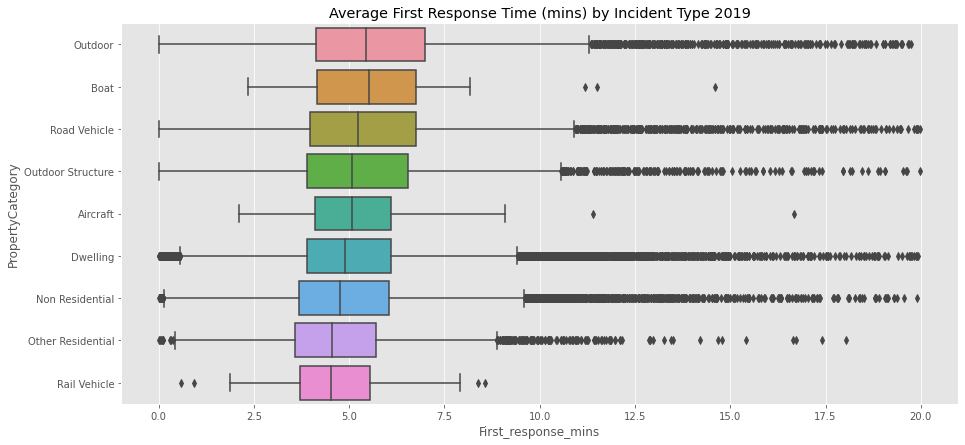

In [45]:
plt.figure(figsize=[15,7],)
plt.title('Average First Response Time (mins) by Incident Type 2019')

ranks = london.groupby("PropertyCategory")["First_response_mins"].mean().fillna(0).sort_values()[::-1].index
sns.boxplot(data=london, y='PropertyCategory', x='First_response_mins', orient='h', order=ranks)

<AxesSubplot:title={'center':'Average Second Response Time (mins) by Incident Type 2019'}, xlabel='First_response_mins', ylabel='PropertyCategory'>

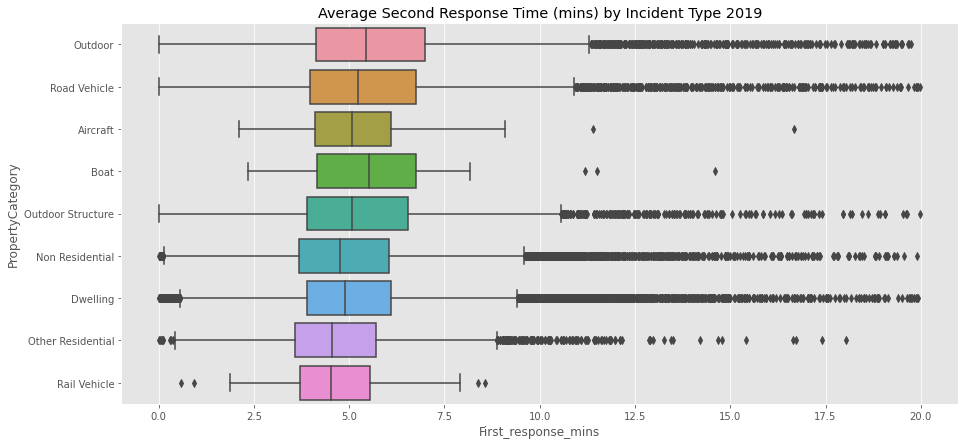

In [47]:
plt.figure(figsize=[15,7],)
plt.title('Average Second Response Time (mins) by Incident Type 2019')

ranks = london.groupby("PropertyCategory")["Second_response_mins"].mean().fillna(0).sort_values()[::-1].index
sns.boxplot(data=london, y='PropertyCategory', x='First_response_mins', orient='h', order=ranks)

<AxesSubplot:ylabel='IncGeo_BoroughName'>

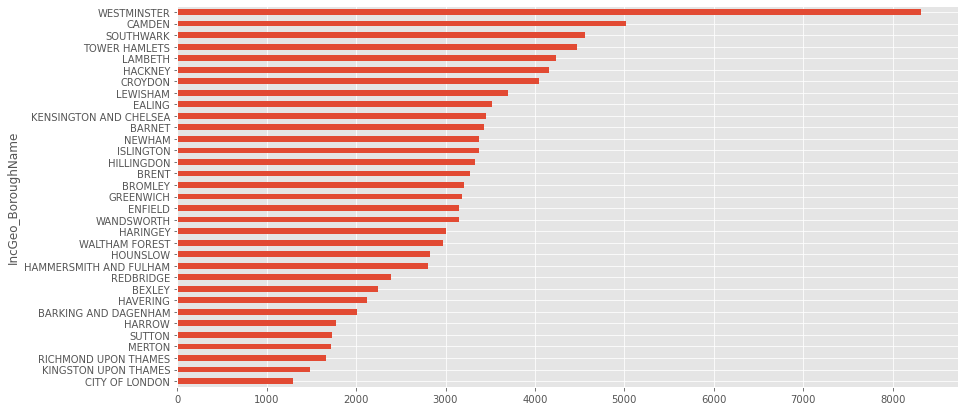

In [48]:
london.groupby(['IncGeo_BoroughName']).size().sort_values().plot(kind='barh', figsize= (14,7))

<AxesSubplot:title={'center':'Average First Response Time (mins) by Borough 2019'}, xlabel='First_response_mins', ylabel='IncGeo_BoroughName'>

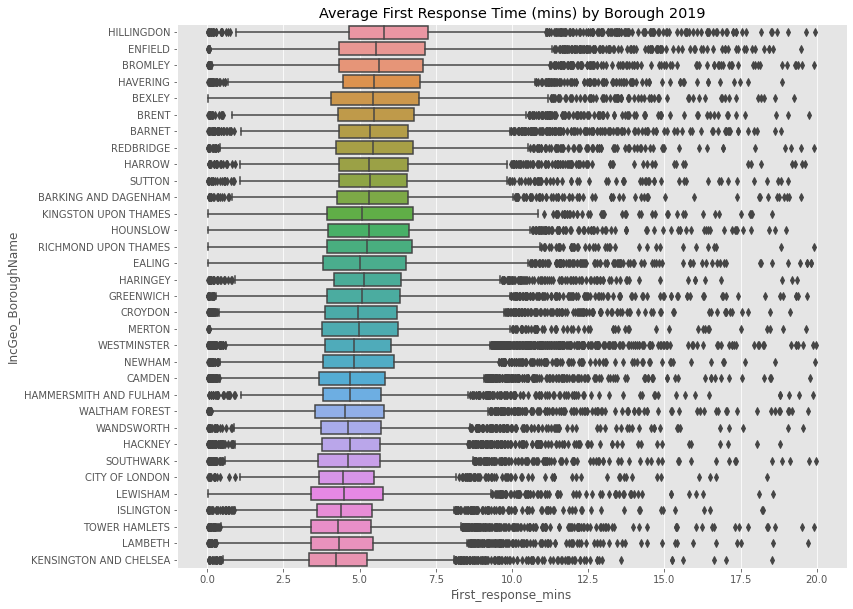

In [14]:
plt.figure(
    figsize=[12, 10], )
plt.title('Average First Response Time (mins) by Borough 2019')

ranks = london.groupby(["IncGeo_BoroughName" ])["First_response_mins"].mean().sort_values()[::-1].index
sns.boxplot(
    data=london,
    y='IncGeo_BoroughName',
    x='First_response_mins',
    orient='h',
    order=ranks,)

In [24]:
datanota = london[london['First_response_mins'].notna()]

In [25]:
datanota

,Unnamed: 0,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,UPRN,USRN,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),First_response_mins,Second_response_mins,month
0,209488,000287-01012019,2019-01-01,2019,2:39:50 AM,2,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,Correct incident location,NaN,SE15,0.000000e+00,22502728.0,E09000028,SOUTHWARK,Southwark,E05011113,RYE LANE,RYE LANE,NaN,NaN,534550.0,175850.0,NaN,NaN,London,Peckham,356.0,New Cross,655.0,Greenwich,2.0,2.0,2.0,1.0,333.0,5.933333,10.916667,1
1,209489,000175-01012019,2019-01-01,2019,1:04:04 AM,1,Fire,Secondary Fire,NaN,Outdoor Structure,Wheelie bin (domestic size),Nearby address - no building in street,TW5 9PP,TW5,2.000040e+11,21590176.0,E09000018,HOUNSLOW,Hounslow,E05000357,HESTON WEST,HESTON WEST,510847.0,177505.0,510850.0,177550.0,51.485644,-0.404939,London,Feltham,460.0,Feltham,NaN,NaN,1.0,1.0,1.0,1.0,333.0,7.666667,NaN,1
2,209490,000159-01012019,2019-01-01,2019,12:54:41 AM,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,On land associated with building,UB5 6TL,UB5,1.204538e+07,20600919.0,E09000009,EALING,Ealing,E05000177,GREENFORD BROADWAY,GREENFORD BROADWAY,513219.0,183256.0,513250.0,183250.0,51.536866,-0.368948,London,Southall,241.0,Southall,NaN,NaN,1.0,1.0,1.0,1.0,333.0,4.016667,NaN,1
3,209491,000610-01012019,2019-01-01,2019,8:29:28 PM,20,Fire,Secondary Fire,NaN,Outdoor Structure,Wheelie bin (domestic size),In street close to gazetteer location,SE15 3NY,SE15,2.000035e+11,22502208.0,E09000028,SOUTHWARK,Southwark,E05011113,RYE LANE,RYE LANE,534492.0,175783.0,534450.0,175750.0,51.465048,-0.065241,London,Peckham,273.0,New Cross,NaN,NaN,1.0,1.0,1.0,1.0,333.0,4.550000,NaN,1
4,209492,000630-01012019,2019-01-01,2019,9:27:27 PM,21,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,E14,0.000000e+00,22702706.0,E09000030,TOWER HAMLETS,Tower Hamlets,E05009325,LANSBURY,LANSBURY,NaN,NaN,537950.0,181950.0,NaN,NaN,London,Poplar,284.0,Poplar,516.0,Millwall,2.0,2.0,2.0,1.0,333.0,4.733333,8.600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105001,314489,176053-31122019,2019-12-31,2019,11:54:55 PM,23,Fire,Secondary Fire,NaN,Outdoor,Hedge,On land associated with building,IG5 0XE,IG5,1.000231e+11,22304862.0,E09000026,REDBRIDGE,Redbridge,E05011243,FULLWELL,FULLWELL,543307.0,190805.0,543350.0,190850.0,51.597869,0.067673,London,Hainault,390.0,Hainault,NaN,NaN,1.0,1.0,1.0,1.0,339.0,6.500000,NaN,12
105002,314490,176007-31122019,2019-12-31,2019,10:19:49 PM,22,Special Service,Special Service,Flooding,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,W13,0.000000e+00,20601044.0,E09000009,EALING,Ealing,E05000192,WALPOLE,WALPOLE,NaN,NaN,516450.0,180350.0,NaN,NaN,London,Ealing,409.0,Acton,NaN,NaN,1.0,1.0,1.0,1.0,339.0,6.816667,NaN,12
105003,314491,175987-31122019,2019-12-31,2019,9:20:55 PM,21,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,IG11,0.000000e+00,19900672.0,E09000002,BARKING AND DAGENHAM,Barking And dagenham,E05000026,ABBEY,ABBEY,NaN,NaN,543950.0,184450.0,NaN,NaN,London,Barking,287.0,Barking,NaN,NaN,1.0,1.0,1.0,1.0,339.0,4.783333,NaN,12
105006,314494,175769-31122019,2019-12-31,2019,9:56:27 AM,9,False Alarm,AFA,NaN,Non Residen

In [29]:
datanota['First_response_mins']

0         5.933333
1         7.666667
2         4.016667
3         4.550000
4         4.733333
            ...   
105001    6.500000
105002    6.816667
105003    4.783333
105006    4.716667
105007    5.116667
Name: First_response_mins, Length: 98973, dtype: float64

In [30]:
datanota['First_response_mins'] = datanota['First_response_mins'].astype("int")

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
boroughtime=pd.DataFrame(datanota.groupby((["IncGeo_BoroughName" ])["First_response_mins"].mean()).size().sort_values(ascending=False))


TypeError: list indices must be integers or slices, not str